# Crop recommendation Model

# Problem Statement
Agriculture is an important industry in India. It is essential for the survival and growth of the Indian economy. India is a large producer of a variety of agricultural products. Soil is an important factor in crop cultivation. Soil is a non- renewable dynamic natural resource that is necessary for life. Previously, crop cultivation was done by farmers who had hands-on experience. Farmers face difficulties in choosing the best suitable crop based on soil characteristics and features.

So, a recommendation system has been developed that employs machine learning algorithms to recommend the crop that can be harvested in a particular soil

# Goals
The goal is to determine which crop is suitable for certain soil conditions.

# Objective
The objective is to analyze conditions of soils based on several variables, determine what variables affect soil conditions the most and contribute in recommendation of crops, then build a model that can recommend the crop.

# IMPORT MODULE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

# READ THE DATASET

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Crop.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
df.tail()   

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [4]:
df.sample(7)

N   P   K  temperature   humidity        ph    rainfall        label
1729  70  54  46    39.731491  91.122206  6.919342  122.762865       papaya
1352  95  12  46    26.216676  81.010094  6.322817   54.654236   watermelon
1707  34  65  47    23.485470  93.710437  6.833769  191.776056       papaya
67    86  59  35    25.787206  82.111240  6.946636  243.512041         rice
1173   9  38  25    34.585615  50.340353  5.497947  100.306072        mango
915   16  15  42    19.678321  89.089357  6.890784  108.546863  pomegranate
728   32  66  17    34.946616  65.267740  7.162358   70.141514    blackgram

In [5]:
df.shape

(2200, 8)

In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [10]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [11]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [15]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary

K       N       P   humidity        ph    rainfall  \
label                                                                  
apple        199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana        50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram     19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea      79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut       30.59   21.98   16.93  94.844272  5.976562  175.686646   
coffee        29.94  101.20   28.74  58.869846  6.790308  158.066295   
cotton        19.56  117.77   46.24  79.843474  6.912675   80.398043   
grapes       200.11   23.18  132.53  81.875228  6.025937   69.611829   
jute          39.99   78.40   46.86  79.639864  6.732778  174.792798   
kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
lentil        19.41   18.77   68.36  64.804785  6.927932   45.680454   
maize         19.79   77.76   48.44  65.092249  6.245190   84.766988   
mango         29.92   20.07   27.18  50.156573  5.766373   94.704515   
mothbeans     20.23   21.44   48.01  53.160418  6.831174   51.198487   
mungbean      19.87   20.99   47.28  85.499975  6.723957   48.403601   
muskmelon     50.08  100.32   17.72  92.342802  6.358805   24.689952   
orange        10.01   19.58   16.55  92.170209  7.016957  110.474969   
papaya        50.04   49.88   59.05  92.403388  6.741442  142.627839   
pigeonpeas    20.29   20.73   67.73  48.061633  5.794175  149.457564   
pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
rice          39.87   79.89   47.58  82.272822  6.425471  236.181114   
watermelon    50.22   99.42   17.00  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

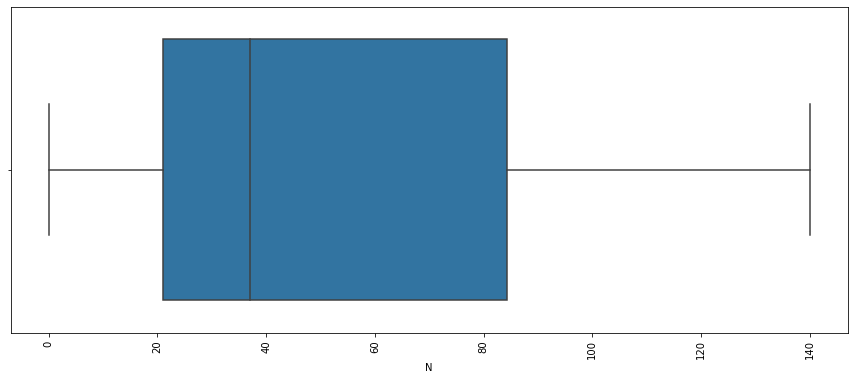

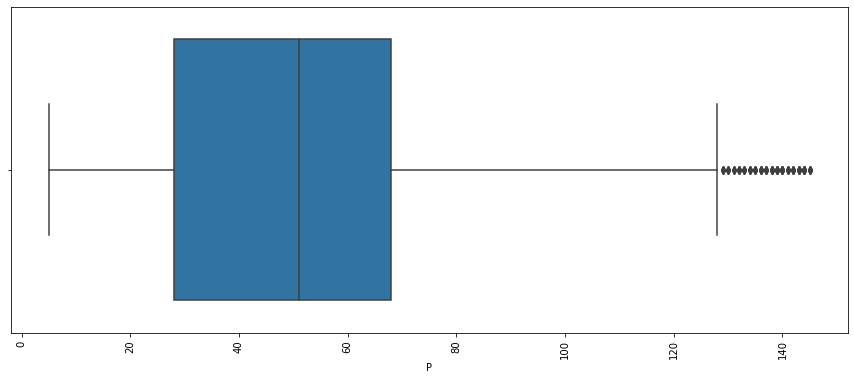

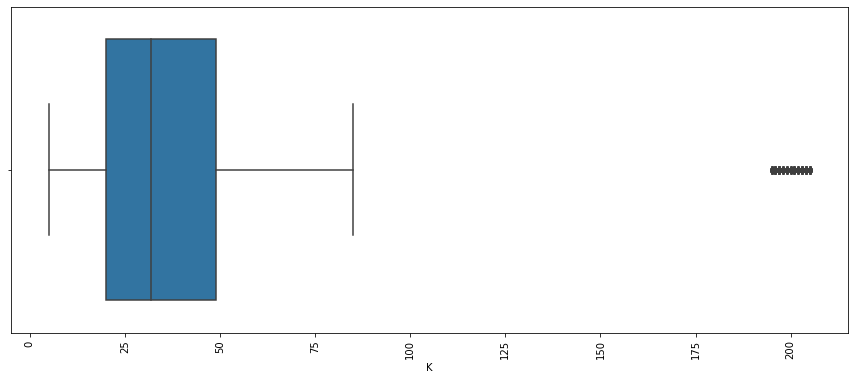

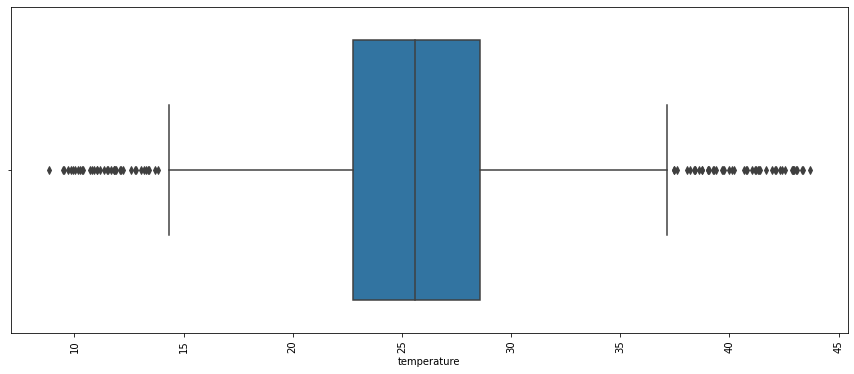

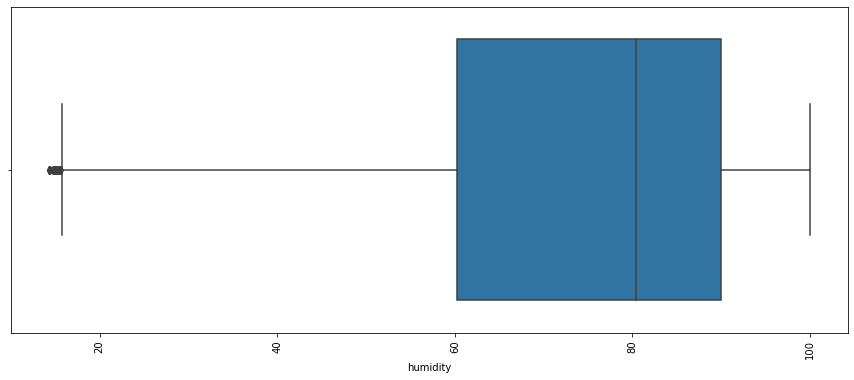

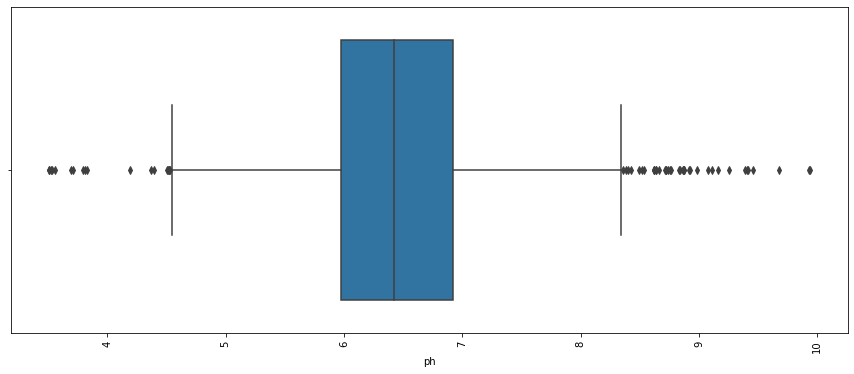

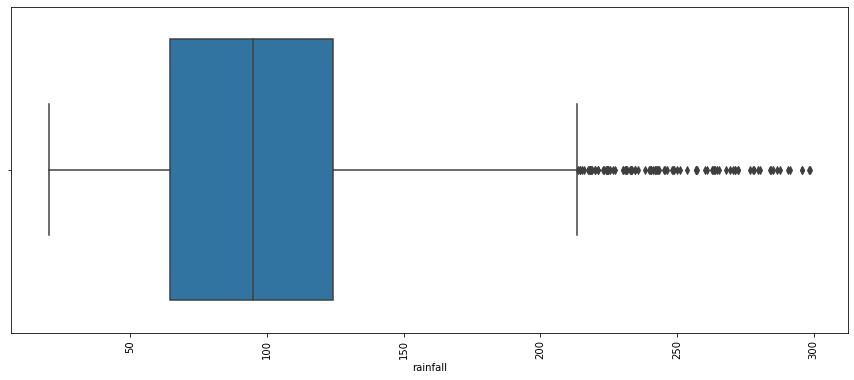

In [17]:
df1 = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(df1[i])
    plt.xticks(rotation = 90)
    plt.show()


In [19]:
crop_summary_new = crop_summary.reset_index()
crop_summary_new

label       K       N       P   humidity        ph    rainfall  \
0         apple  199.89   20.80  134.22  92.333383  5.929663  112.654779   
1        banana   50.05  100.23   82.01  80.358123  5.983893  104.626980   
2     blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
3      chickpea   79.92   40.09   67.79  16.860439  7.336957   80.058977   
4       coconut   30.59   21.98   16.93  94.844272  5.976562  175.686646   
5        coffee   29.94  101.20   28.74  58.869846  6.790308  158.066295   
6        cotton   19.56  117.77   46.24  79.843474  6.912675   80.398043   
7        grapes  200.11   23.18  132.53  81.875228  6.025937   69.611829   
8          jute   39.99   78.40   46.86  79.639864  6.732778  174.792798   
9   kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
10       lentil   19.41   18.77   68.36  64.804785  6.927932   45.680454   
11        maize   19.79   77.76   48.44  65.092249  6.245190   84.766988   
12        mango   29.92   20.07   27.18  50.156573  5.766373   94.704515   
13    mothbeans   20.23   21.44   48.01  53.160418  6.831174   51.198487   
14     mungbean   19.87   20.99   47.28  85.499975  6.723957   48.403601   
15    muskmelon   50.08  100.32   17.72  92.342802  6.358805   24.689952   
16       orange   10.01   19.58   16.55  92.170209  7.016957  110.474969   
17       papaya   50.04   49.88   59.05  92.403388  6.741442  142.627839   
18   pigeonpeas   20.29   20.73   67.73  48.061633  5.794175  149.457564   
19  pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
20         rice   39.87   79.89   47.58  82.272822  6.425471  236.181114   
21   watermelon   50.22   99.42   17.00  85.160375  6.495778   50.786219   

    temperature  
0     22.630942  
1     27.376798  
2     29.973340  
3     18.872847  
4     27.409892  
5     25.540477  
6     23.988958  
7     23.849575  
8     24.958376  
9     20.115085  
10    24.509052  
11    22.389204  
12    31.208770  
13    28.194920  
14    28.525775  
15    28.663066  
16    22.765725  
17    33.723859  
18    27.741762  
19    21.837842  
20    23.689332  
21    25.591767

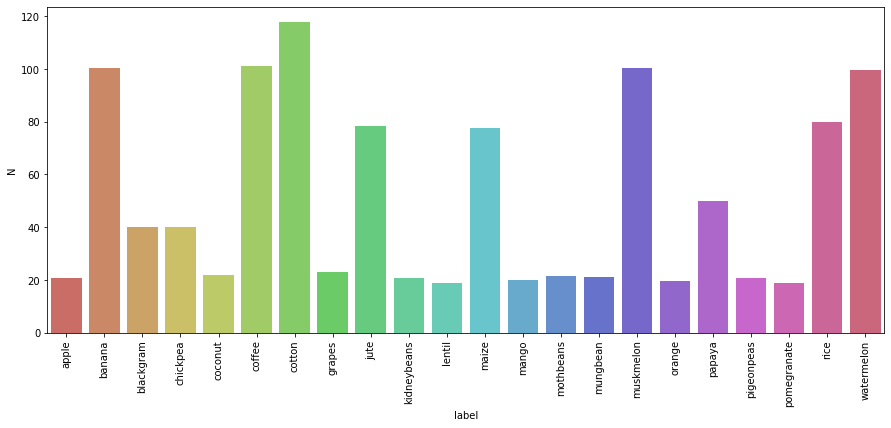

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'N', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [21]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [22]:
fig1 = px.bar(crop_summary_new, x='label', y='N')
fig1.show()

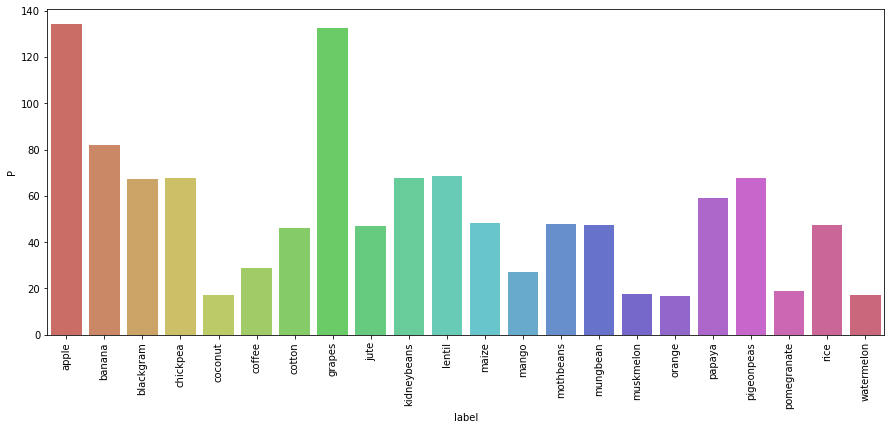

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'P', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [24]:
fig2 = px.bar(crop_summary_new, x='label', y='P')
fig2.show()

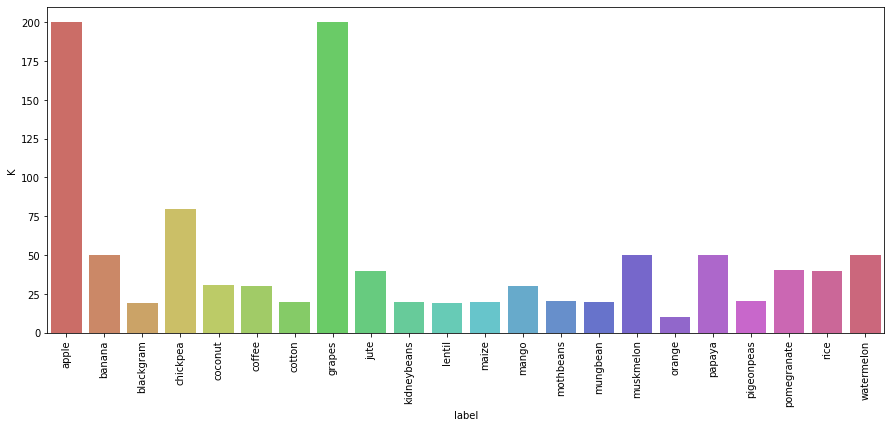

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'K', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [26]:
fig3 = px.bar(crop_summary_new, x='label', y='K')
fig3.show()

In [30]:
df.corr()

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

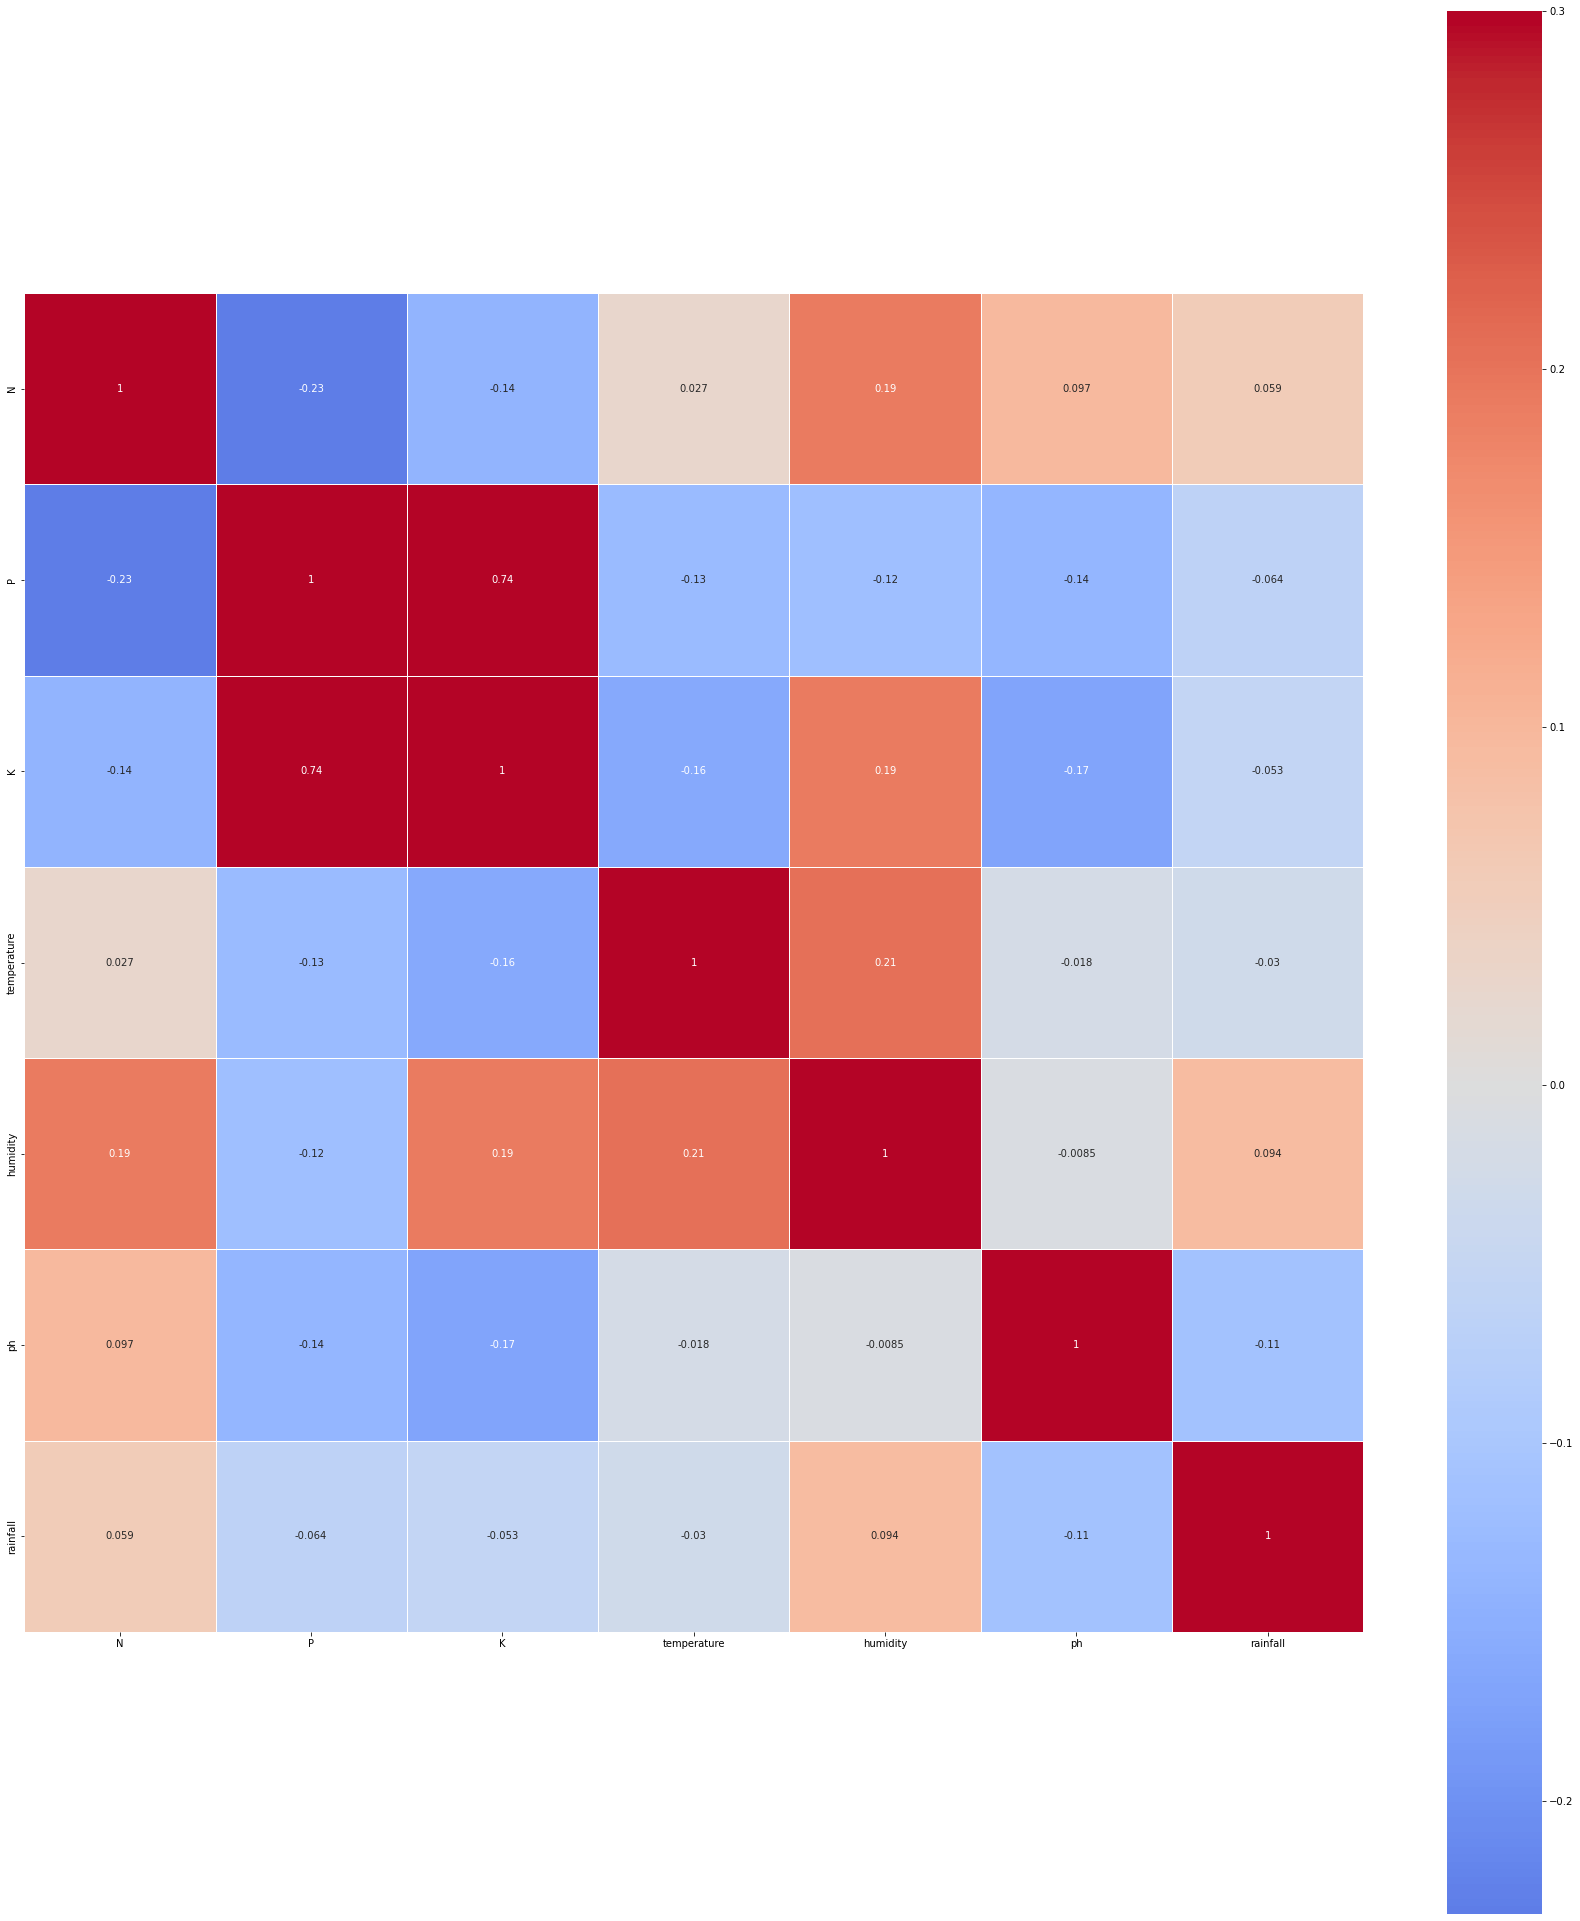

In [31]:
plt.figure(figsize=(30,35))
sns.heatmap(df.corr(),  cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [33]:
import networkx as nx
corr=df.corr()
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])
G.edges(data=True)

EdgeDataView([('N', 'N', {'weight': 1.0}), ('N', 'P', {'weight': -0.23145957738457262}), ('N', 'K', {'weight': -0.14051183844915763}), ('N', 'temperature', {'weight': 0.026503796219081235}), ('N', 'humidity', {'weight': 0.19068837919787315}), ('N', 'ph', {'weight': 0.09668284622242848}), ('N', 'rainfall', {'weight': 0.05902022369254324}), ('P', 'P', {'weight': 1.0}), ('P', 'K', {'weight': 0.736232217244661}), ('P', 'temperature', {'weight': -0.12754112864533876}), ('P', 'humidity', {'weight': -0.11873411647954892}), ('P', 'ph', {'weight': -0.13801889348863647}), ('P', 'rainfall', {'weight': -0.063839051330259}), ('K', 'K', {'weight': 1.0}), ('K', 'temperature', {'weight': -0.16038713278089597}), ('K', 'humidity', {'weight': 0.1908588608364631}), ('K', 'ph', {'weight': -0.16950309817325426}), ('K', 'rainfall', {'weight': -0.05346135449256889}), ('temperature', 'temperature', {'weight': 1.0}), ('temperature', 'humidity', {'weight': 0.2053196766307067}), ('temperature', 'ph', {'weight': -

In [34]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < min_correlation or s1==s2:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] > min_correlation or s1==s2:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())

    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(15,15))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=14)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

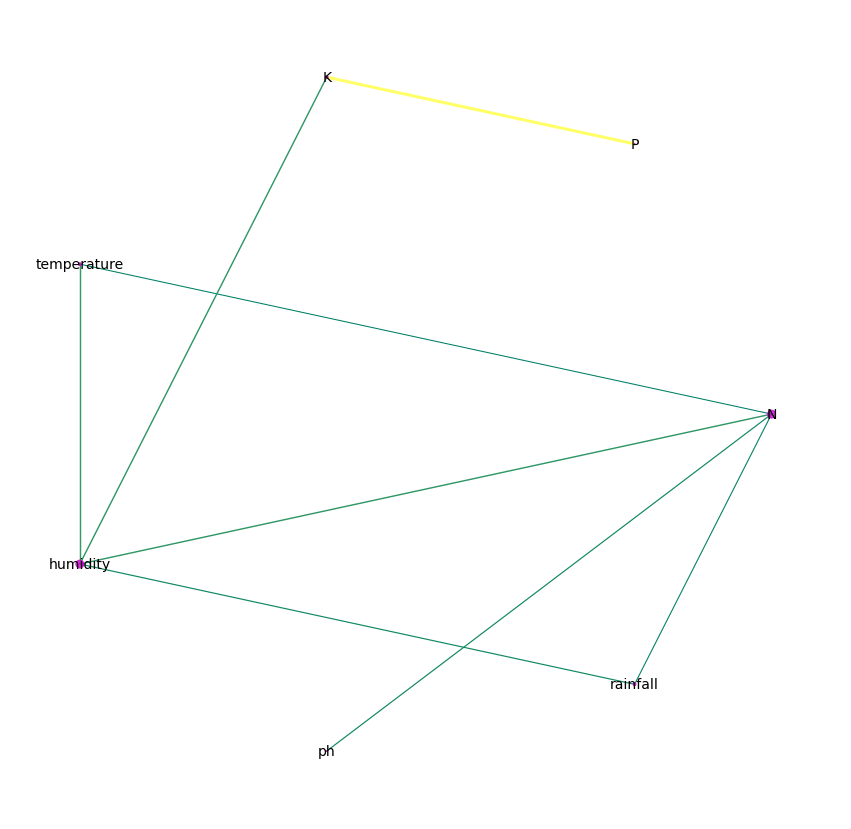

In [35]:
corr_network(G, corr_direction="positive",min_correlation =0)

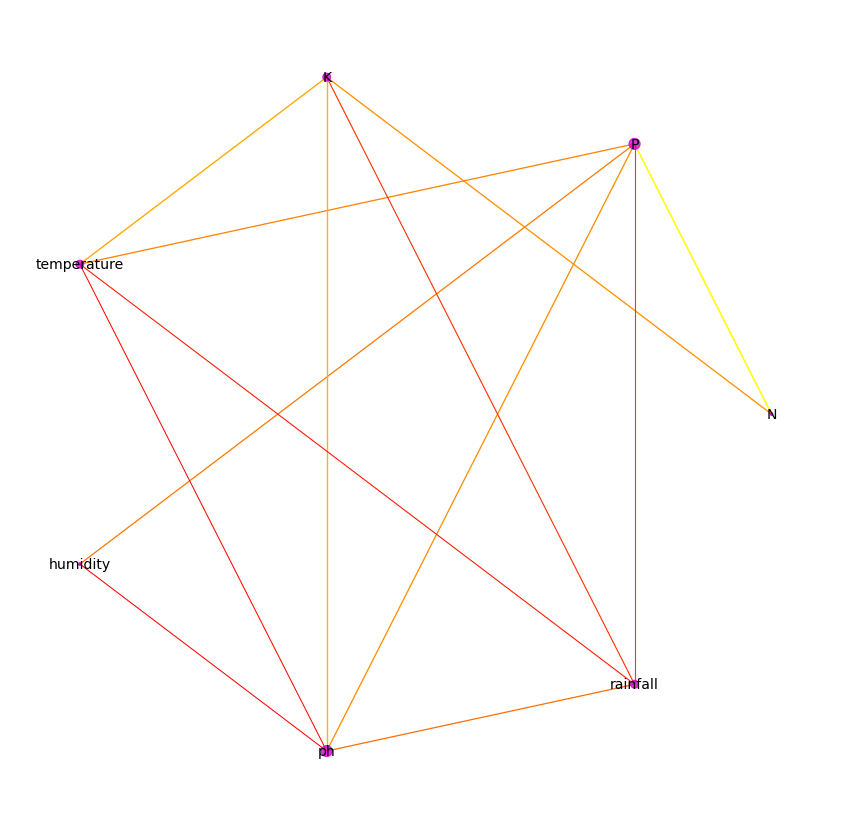

In [36]:
corr_network(G, corr_direction="negative",min_correlation = 0)

In [37]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
fig = make_subplots(rows=1, cols=len(df_num.columns))
featuresNum = df_num.columns

plt.figure(figsize=(50, 40))
for i in range(0, len(featuresNum)):
    trace=go.Box(y=df[featuresNum[i]], name=featuresNum[i])
    fig.append_trace(trace, row=1, col=i+1)

fig.show()

<Figure size 3600x2880 with 0 Axes>

In [38]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
featuresNum = ['N', 'P', 'K']

for i in range(-1, len(featuresNum)-3):
    fig = go.Figure()
    fig.update_layout(autosize=False, width=1280, height=720)
    trace1=go.Scatter(y=df[featuresNum[i+1]], name=featuresNum[i+1])
    fig.add_trace(trace1)
    trace2=go.Scatter(y=df[featuresNum[i+2]], name=featuresNum[i+2])
    fig.add_trace(trace2)
    trace3=go.Scatter(y=df[featuresNum[i+3]], name=featuresNum[i+3])
    fig.add_trace(trace3)
    fig.show()

In [39]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
featuresNum = df_num.columns

plt.figure(figsize=(50, 40))
for i in range(0, len(featuresNum)):
    fig = px.histogram(df, x=featuresNum[i])
    fig.show()

<Figure size 3600x2880 with 0 Axes>

In [40]:
featuresNum = df.columns

plt.figure(figsize=(50, 40))
for i in range(0, len(featuresNum)-1):
  fig = px.pie(df, values=featuresNum[i], names='label', color_discrete_sequence=px.colors.sequential.RdBu, title="Composition of crops with "+featuresNum[i])
  fig.show()

<Figure size 3600x2880 with 0 Axes>

In [42]:
 fig = px.pie(df, values=df['label'].value_counts().values, names=df['label'].value_counts().index, color_discrete_sequence=px.colors.sequential.RdBu, title="Composition of crops class")
fig.show()

In [43]:
fig = px.scatter_matrix(df,
    dimensions=['N', 'P', 'K'],
    color="label")
fig.update_layout(autosize=True, width=1920, height=1080)
fig.show()

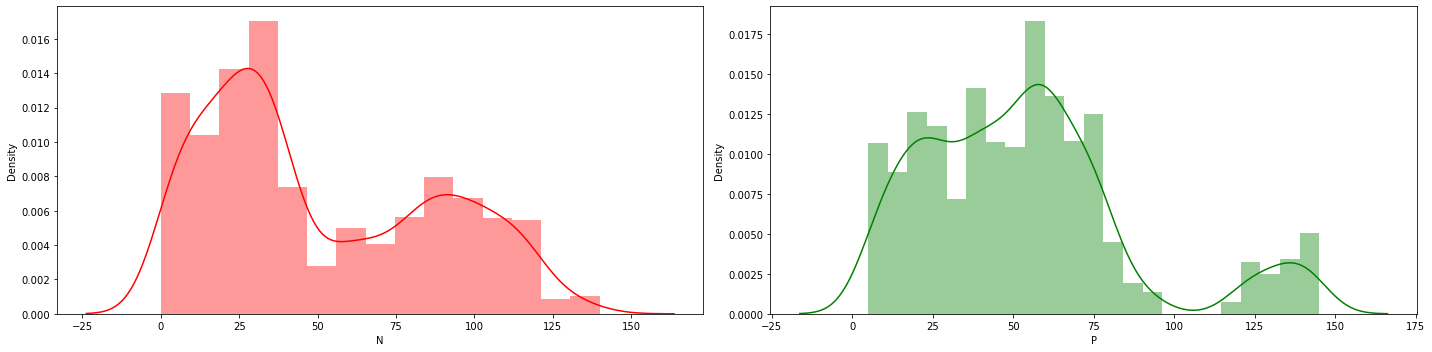

In [72]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(df['N'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(df['P'] , color ='green' , ax = ax)
plt.tight_layout()

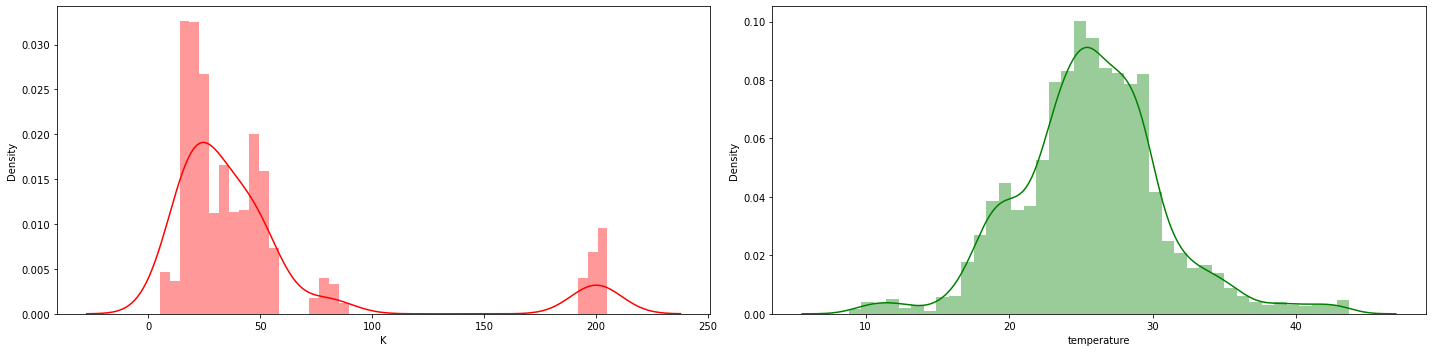

In [73]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(df['K'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(df['temperature'] , color ='green' , ax = ax)
plt.tight_layout()

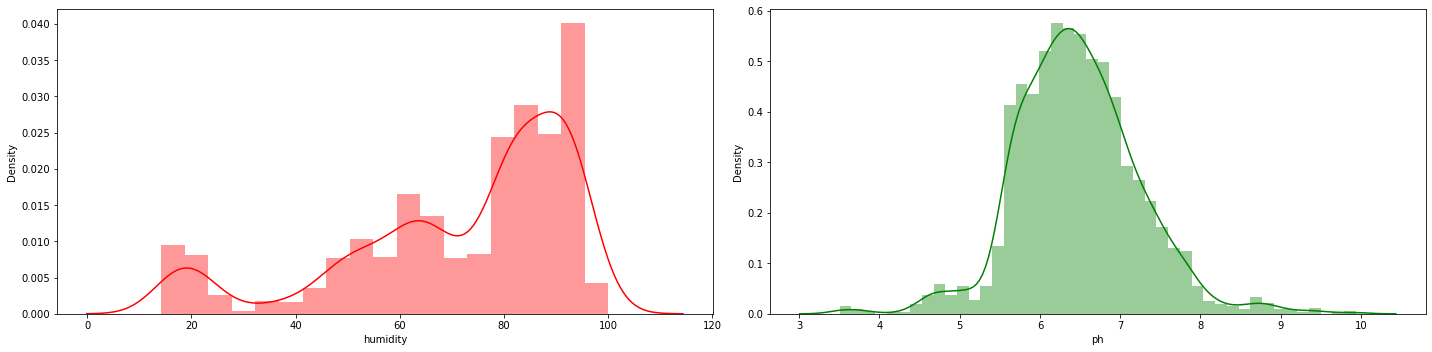

In [76]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(df['humidity'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(df['ph'] , color ='green' , ax = ax)
plt.tight_layout()

<AxesSubplot:xlabel='rainfall', ylabel='Density'>

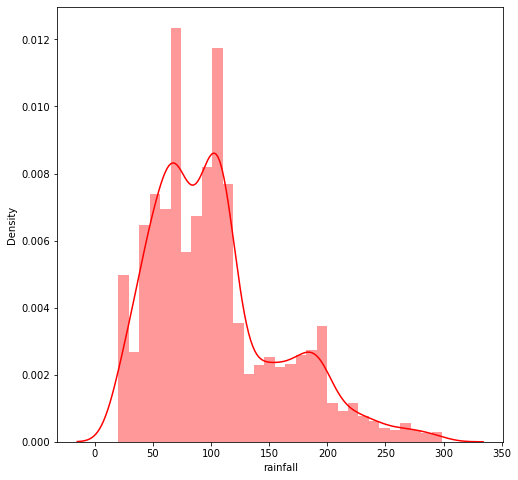

In [75]:
sns.distplot(df['rainfall'],color ='red')

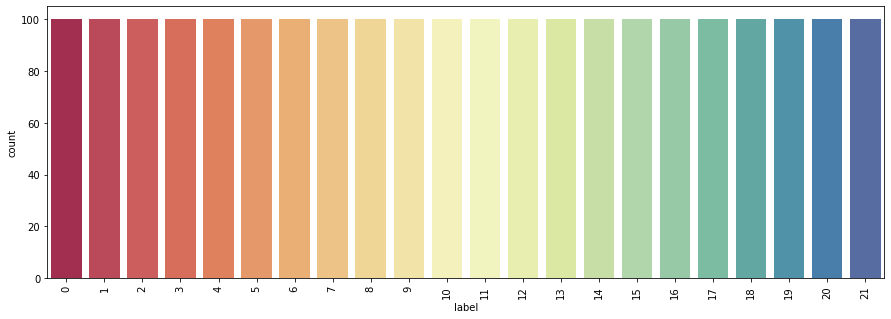

In [77]:
f= plt.figure(figsize=(15,5))
sns.countplot(df['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.show()

In [44]:
fig = px.scatter_matrix(df,
    dimensions=['temperature', 'humidity', 'rainfall',],
    color="label")
fig.update_layout(autosize=True, width=1920, height=1080)
fig.show()

In [45]:
fig = px.scatter_matrix(df,
    dimensions=['ph',],
    color="label")
fig.update_layout(autosize=True, width=1280, height=720)
fig.show()

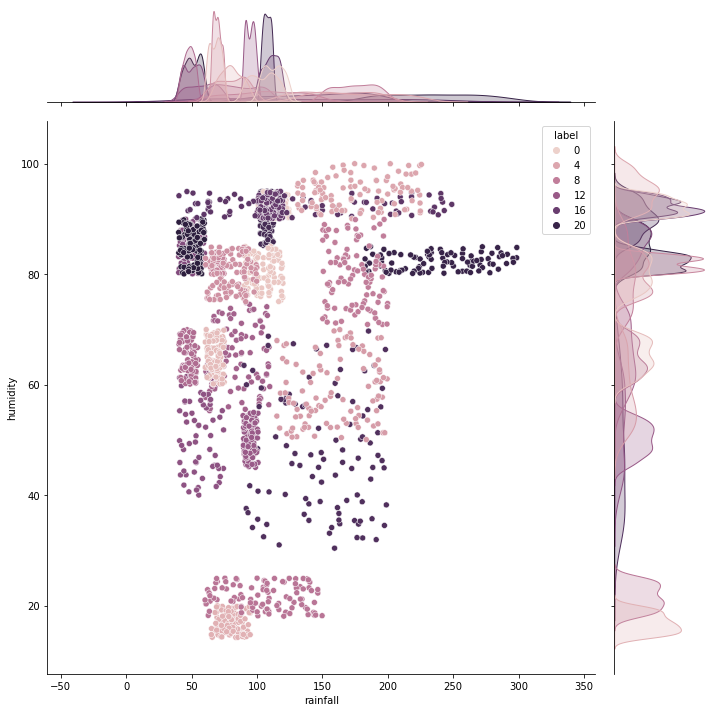

In [110]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<40) & 
                                                  (df['rainfall']>40)],height=10,hue="label")

In [49]:
from sklearn import preprocessing
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split

# Data Pre-processing

In [50]:
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])

df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [51]:
features = df.columns[:-1]
X = df[features] # her we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                # made inplace as we have not used 'inplace = True'
y = df['label']

# Train and val and test split

In [52]:
X_train, X_val_, y_train, y_val_ = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [53]:
X_val, X_test, y_val, y_test = train_test_split(X_val_, y_val_, test_size = 0.5, random_state = 42)

In [54]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X val :", X_val.shape)
print("Shape of the y val :", y_val.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (1540, 7)
Shape of the y Train : (1540,)
Shape of the X val : (330, 7)
Shape of the y val : (330,)
Shape of the X test : (330, 7)
Shape of the y test : (330,)


# Feature Selection Method

In [56]:
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from matplotlib import pyplot

Importance of N is 634.109614
Importance of P is 1370.832913
Importance of K is 19278.607456
Importance of temperature is 65.061410
Importance of humidity is 2255.437627
Importance of ph is 47.624288
Importance of rainfall is 478.509208


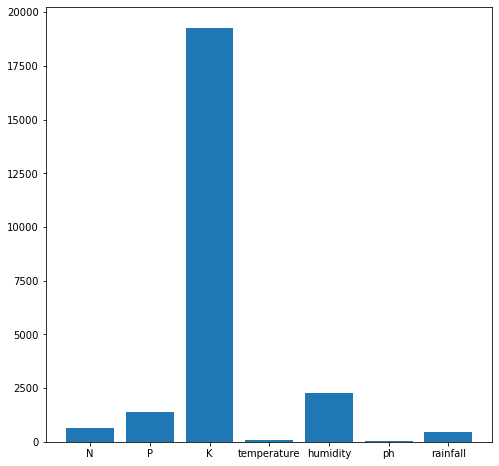

In [57]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
feature_names=X.columns
for i in range(len(fs.scores_)):
	print('Importance of ' +feature_names[i]+' is %f' % (fs.scores_[i]))
# plot the scores
plt.rcParams["figure.figsize"] = (8,8)
pyplot.bar([i for i in X.columns], fs.scores_)
pyplot.show()

In [60]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [65]:
from lazypredict.Supervised import LazyClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split

# Modelling

In [66]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:06<00:00,  4.79it/s]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.99               0.99    None      0.99   
GaussianNB                         0.99               0.99    None      0.99   
QuadraticDiscriminantAnalysis      0.99               0.99    None      0.99   
DecisionTreeClassifier             0.98               0.98    None      0.98   
BaggingClassifier                  0.98               0.98    None      0.98   
ExtraTreesClassifier               0.98               0.98    None      0.98   
XGBClassifier                      0.98               0.98    None      0.98   
LGBMClassifier                     0.98               0.98    None      0.98   
SVC                                0.98               0.97    None      0.98   
LabelSpreading                     0.97               0.97    None      0.97   
LabelPropagation                   0.97               0.97    None      0.97   
LinearSVC                          0.95               0.96    None      0.95   
KNeighborsClassifier               0.96               0.96    None      0.96   
CalibratedClassifierCV             0.95               0.95    None      0.95   
LogisticRegression                 0.95               0.95    None      0.95   
NuSVC                              0.95               0.94    None      0.94   
LinearDiscriminantAnalysis         0.94               0.94    None      0.94   
SGDClassifier                      0.89               0.89    None      0.90   
ExtraTreeClassifier                0.88               0.87    None      0.87   
NearestCentroid                    0.86               0.85    None      0.86   
Perceptron                         0.86               0.85    None      0.86   
PassiveAggressiveClassifier        0.82               0.82    None      0.82   
BernoulliNB                        0.79               0.78    None      0.78   
RidgeClassifier                    0.67               0.67    None      0.60   
RidgeClassifierCV                  0.67               0.67    None      0.60   
AdaBoostClassifier                 0.23               0.23    None      0.19   
DummyClassifier                    0.03               0.05    None      0.00   

                               Time Taken  
Model                                      
RandomForestClassifier               0.32  
GaussianNB                           0.01  
QuadraticDiscriminantAnalysis        0.02  
DecisionTreeClassifier               0.03  
BaggingClassifier                    0.07  
ExtraTreesClassifier                 0.23  
XGBClassifier                        1.43  
LGBMClassifier                       1.93  
SVC                                  0.12  
LabelSpreading                       0.14  
LabelPropagation                     0.08  
LinearSVC                            0.09  
KNeighborsClassifier                 0.06  
CalibratedClassifierCV               0.51  
LogisticRegression                   0.17  
NuSVC                                0.28  
LinearDiscriminantAnalysis           0.05  
SGDClassifier                        0.07  
ExtraTreeClassifier                  0.01  
NearestCentroid                      0.02  
Perceptron                           0.04  
PassiveAggressiveClassifier          0.06  
BernoulliNB                          0.02  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.02  
AdaBoostClassifier                   0.20  
DummyClassifier                      0.01

In [67]:
model = GaussianNB()

In [68]:
model.fit(X_train, y_train)  

GaussianNB()

In [69]:
y_pred_test= model.predict(X_test)  

In [70]:
print(classification_report(np.array(y_test), y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        12
           8       0.89      1.00      0.94        17
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        14
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00        12
          17       1.00    

# SEPERATING FEATURES AND TARGET LABEL

In [79]:
X = df.drop('label' ,axis =1)
X.head()

N   P   K  temperature  humidity   ph  rainfall
0  90  42  43        20.88     82.00 6.50    202.94
1  85  58  41        21.77     80.32 7.04    226.66
2  60  55  44        23.00     82.32 7.84    263.96
3  74  35  40        26.49     80.16 6.98    242.86
4  78  42  42        20.13     81.60 7.63    262.72

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()

In [82]:
df['label'] = le.fit_transform(df['label'])
df.head()

N   P   K  temperature  humidity   ph  rainfall  label
0  90  42  43        20.88     82.00 6.50    202.94     20
1  85  58  41        21.77     80.32 7.04    226.66     20
2  60  55  44        23.00     82.32 7.84    263.96     20
3  74  35  40        26.49     80.16 6.98    242.86     20
4  78  42  42        20.13     81.60 7.63    262.72     20

In [83]:
y = df['label']
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int64

In [84]:
model = []
accuracy = []

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# DECISION TREE

In [87]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)

DecisionTreeClassifier()

In [88]:
predict = DT.predict(X_test)

In [89]:
DT_accuracy = DT.score(X_test,y_test)

In [90]:
DT_accuracy

0.9840909090909091

In [91]:
accuracy.append(DT_accuracy)

In [92]:
model.append('Decision Tree')

# LOGISTIC REGRESSION

In [93]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train , y_train)

LogisticRegression()

In [94]:
LG_accuracy = LG.score(X_test,y_test)
LG_accuracy

0.9454545454545454

In [95]:
accuracy.append(LG_accuracy)

In [96]:
model.append('Logistic Regression')

# RANDOM FOREST

In [97]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train , y_train)

RandomForestClassifier()

In [98]:
RF_accuracy = RF.score(X_test,y_test)
RF_accuracy

0.9931818181818182

In [99]:
accuracy.append(RF_accuracy)
model.append('Random Forest')

In [100]:
model

['Decision Tree', 'Logistic Regression', 'Random Forest']

In [101]:
accuracy

[0.9840909090909091, 0.9454545454545454, 0.9931818181818182]

<AxesSubplot:>

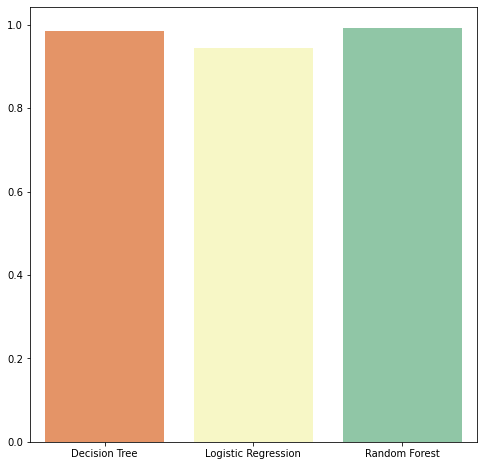

In [102]:
sns.barplot(x = model , y = accuracy ,palette ='Spectral')

<AxesSubplot:>

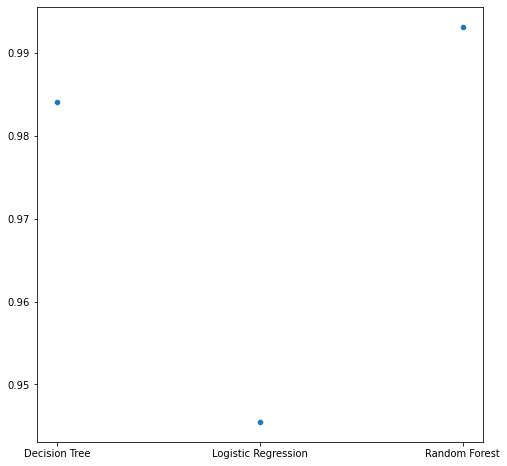

In [103]:
sns.scatterplot(x = model , y = accuracy ,palette ='Spectral')

<AxesSubplot:>

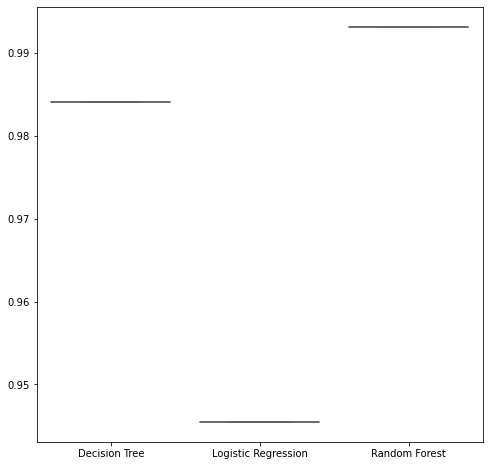

In [104]:
sns.boxplot(x = model , y = accuracy ,palette ='Spectral')

<Figure size 1368x1224 with 0 Axes>

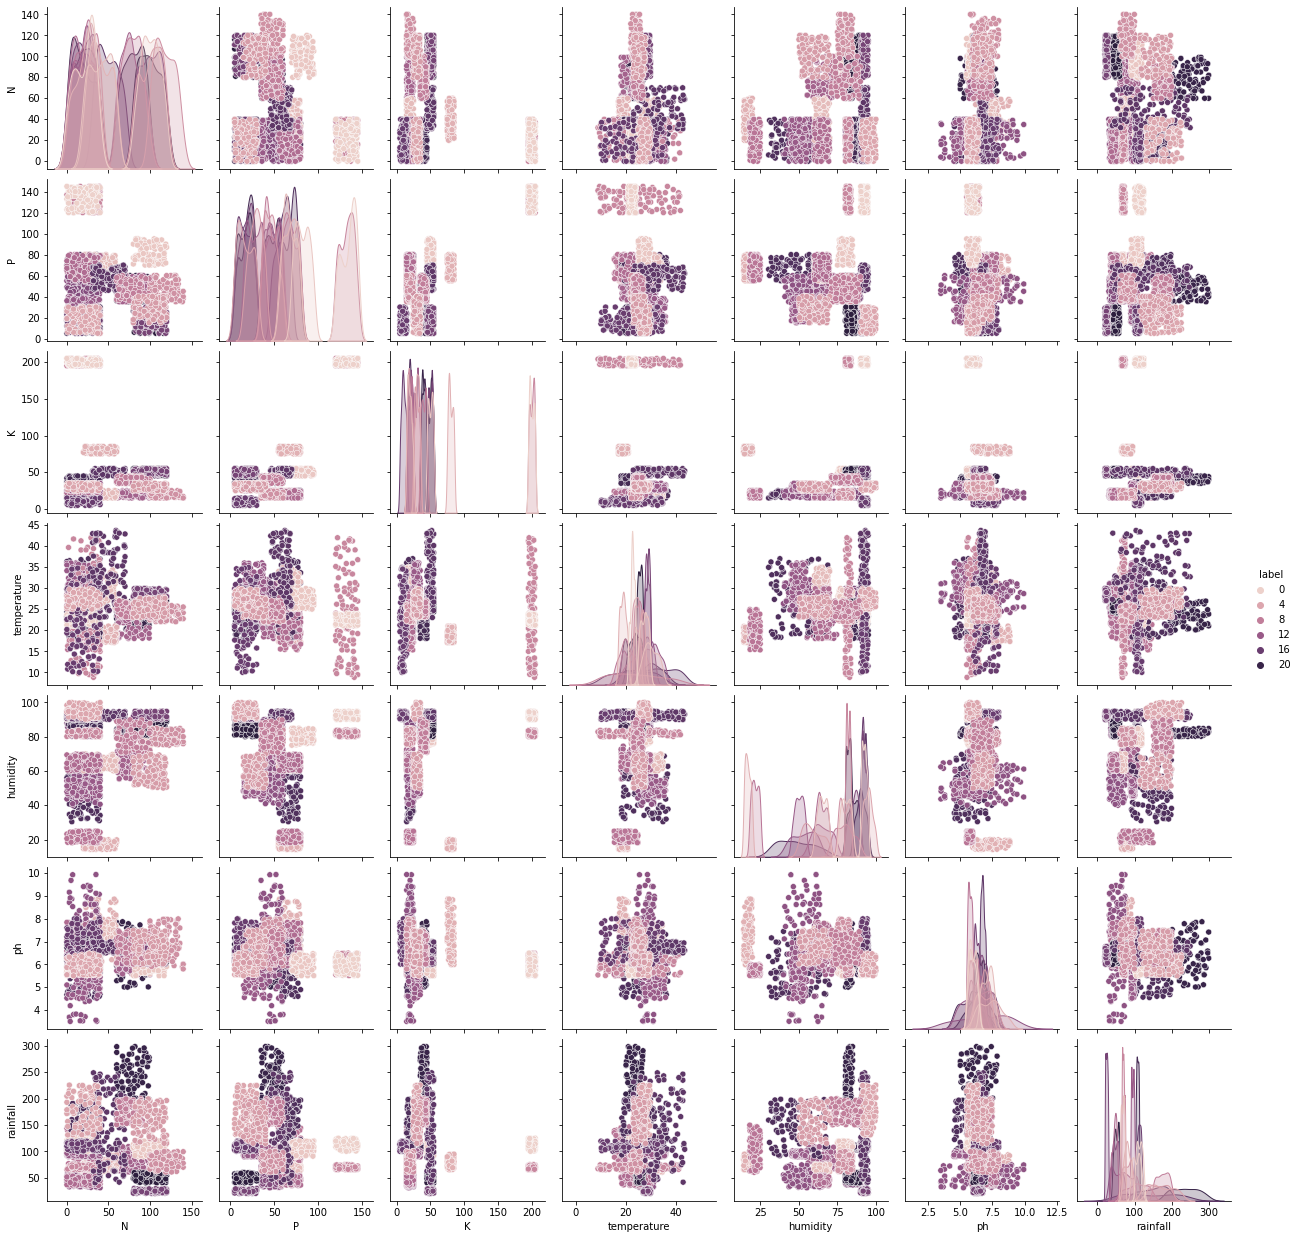

In [108]:
plt.figure(figsize=(19,17))
sns.pairplot(df, hue = "label")
plt.show()

# THANK YOU